In [1]:
%run dcgan.ipynb
%run code.ipynb

import ipynb.fs.full.code as code
import ipynb.fs.full.dcgan as dcgan
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
enum = ['all', 'bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']

In [3]:
def dict_fakemons(path):

    p, d, fs = next(os.walk(path))
    gen_fakemons = {}
    
    for file in fs:
        file = file.replace('.pth', '')
        model = dcgan.load_gen(path, file)
        gen_fakemons[file] = model
        
    return gen_fakemons

In [7]:
def RunAll():

    path = 'data/'
    gen_fakemons = dict_fakemons('models/Generator/')


    # choice of the type to do
    random_type = code.rand_type()

    while (code.check_if_done(random_type)):
        random_type = code.rand_type()

    print("Type(s) chosen for creating new Pokemon : " + random_type)

    # preparing the gan
    trainloader = code.create_trainloader(path, random_type)
    generator, discriminator = code.create_gen_dis()

    print("preparing done")

    # doing the gan
    res_gen, res_dis, images = code.ml(trainloader, generator, discriminator, epochs = 500)

    print("ml done")

    # saving the models
    saving_gen = 'models/Generator/'
    saving_dis = 'models/Discriminator/'

    code.save_models(res_gen, res_dis, random_type)
    print("saving done")

    modelG, modelD = code.load_models(random_type)
    gen_fakemons[random_type] = modelG
    print("adding gen to dict done\n\n\n\n\n")

    dcgan.delete_directory('to_delete')

Type(s) chosen for creating new Pokemon : rock
preparing done
Epoch: 1 / 500 	Discriminator Loss: 0.011110 	Generator Loss: 0.068211
Epoch: 2 / 500 	Discriminator Loss: 0.001397 	Generator Loss: 0.044227
Epoch: 3 / 500 	Discriminator Loss: 0.000719 	Generator Loss: 0.034423
Epoch: 4 / 500 	Discriminator Loss: 0.000536 	Generator Loss: 0.031548


KeyboardInterrupt: 

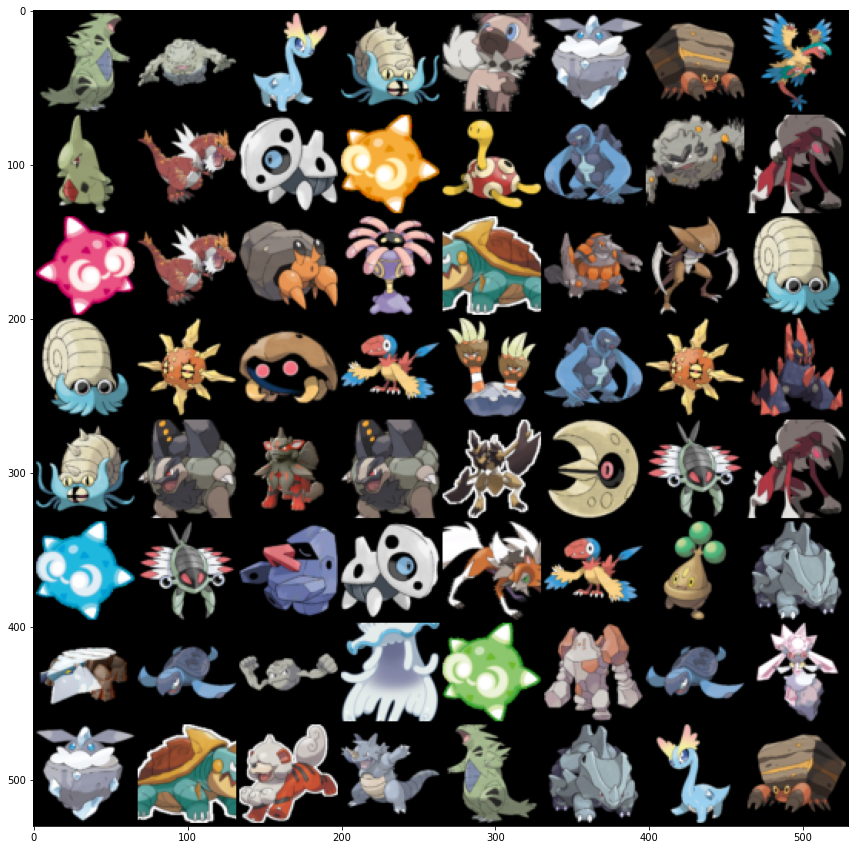

In [8]:
RunAll()